In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
machines = pd.read_csv("data/machines_full.csv")

In [26]:
machines[['system','prompt', 'model']] = machines["type"].apply(lambda x: pd.Series(x.split("/")))

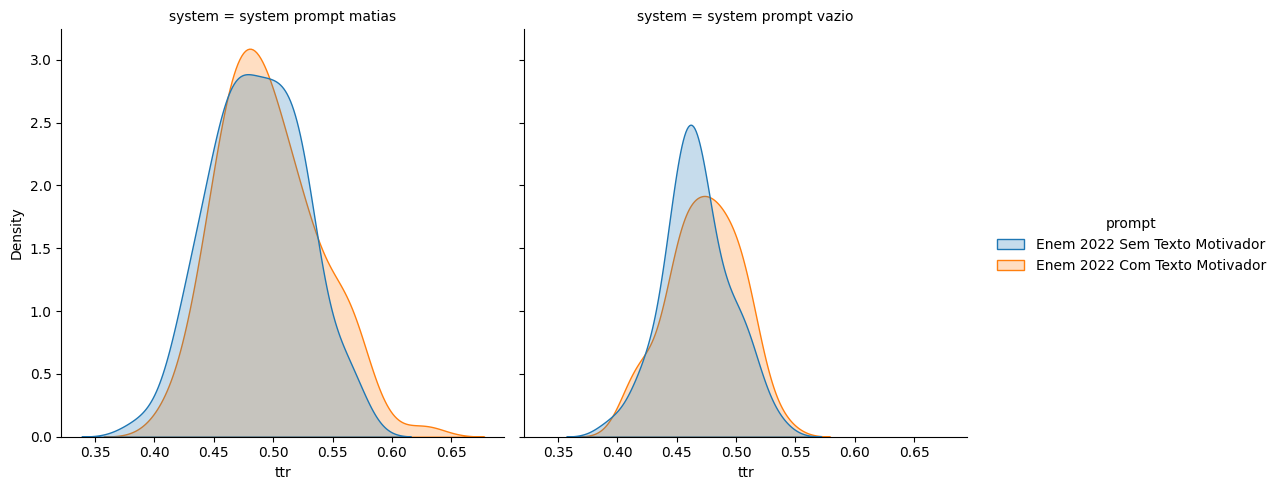

In [27]:
sns.displot(machines,hue="prompt",x="ttr",col="system",kind="kde",fill=True)

In [28]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


group = 'system'
grouped_data = machines.groupby(group)

group1 = grouped_data.get_group(machines[group].unique()[0])
group2 = grouped_data.get_group(machines[group].unique()[1])

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in machines.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2,permutations=100)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [29]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)

In [30]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
1,MLS,-2.777331,0.019802,True,False
2,MLT,-4.148605,0.009901,True,False
4,DCT,-3.249118,0.019802,True,False
5,CPC,-5.044330,0.009901,True,False
6,CPT,-5.015043,0.009901,True,False
7,TS,4.955016,0.009901,True,False
9,lexical_sophistication,-3.025850,0.009901,True,False
10,ttr,4.663510,0.009901,True,False
11,d-measure,4.368806,0.009901,True,False
12,profundidade_media,-4.090979,0.009901,True,False


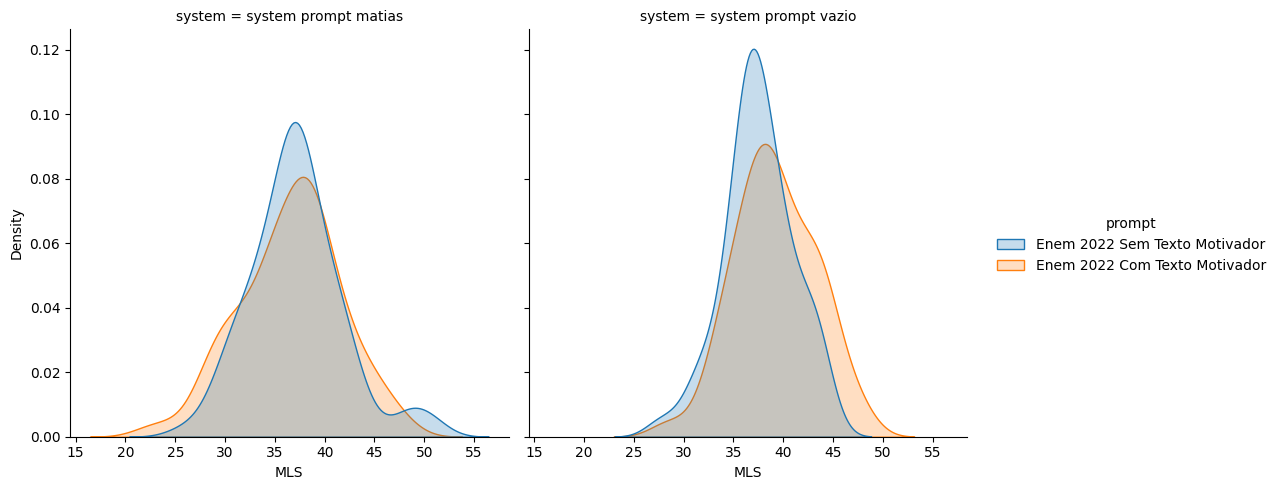

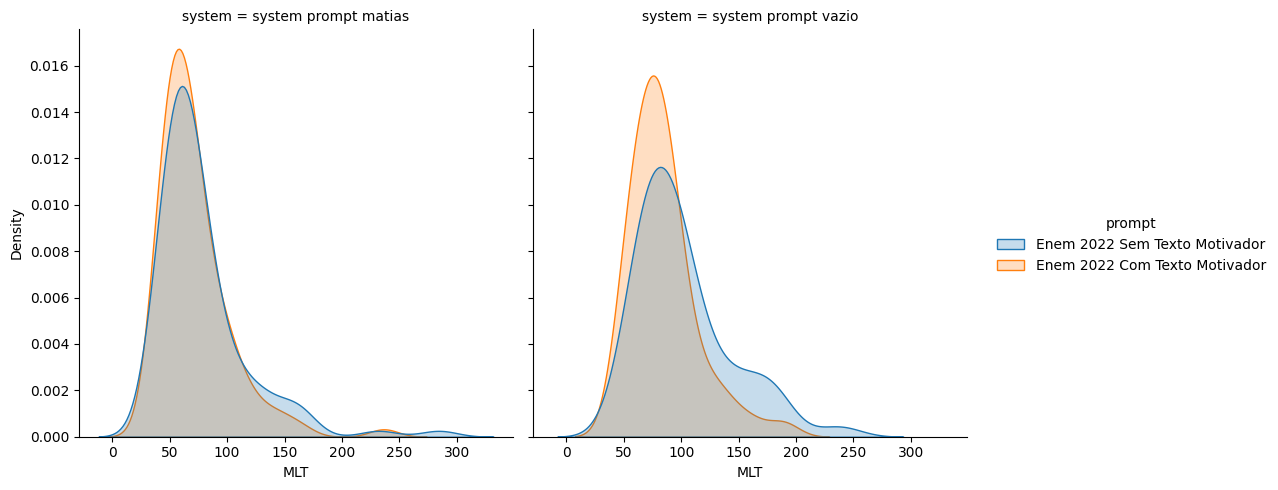

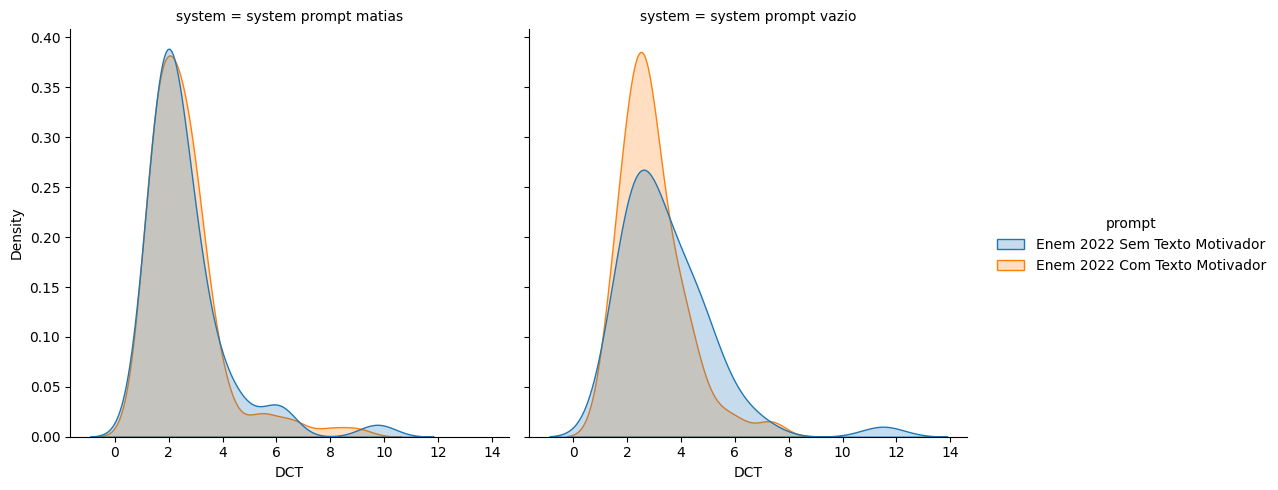

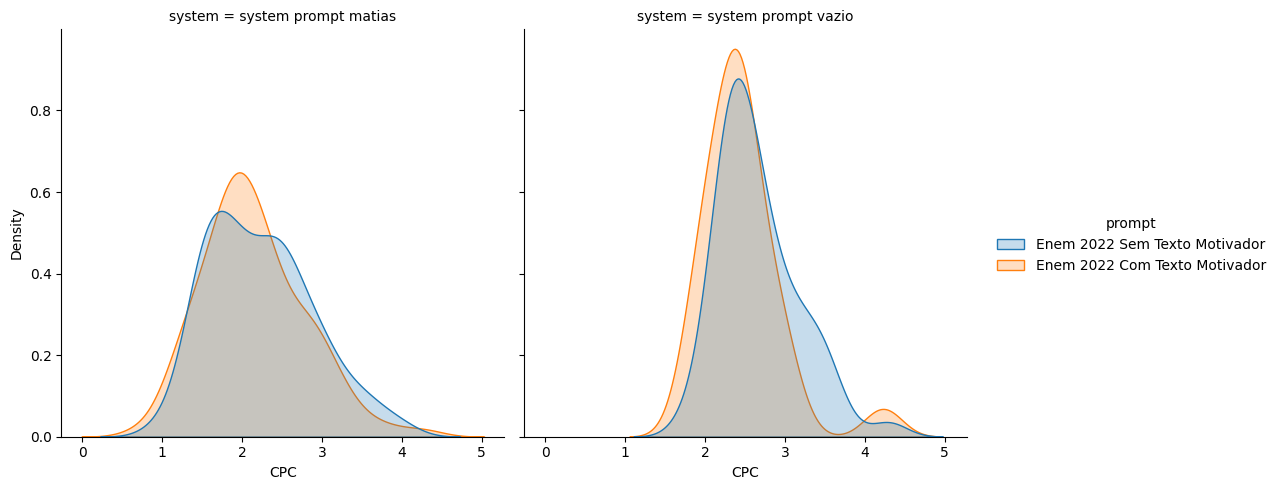

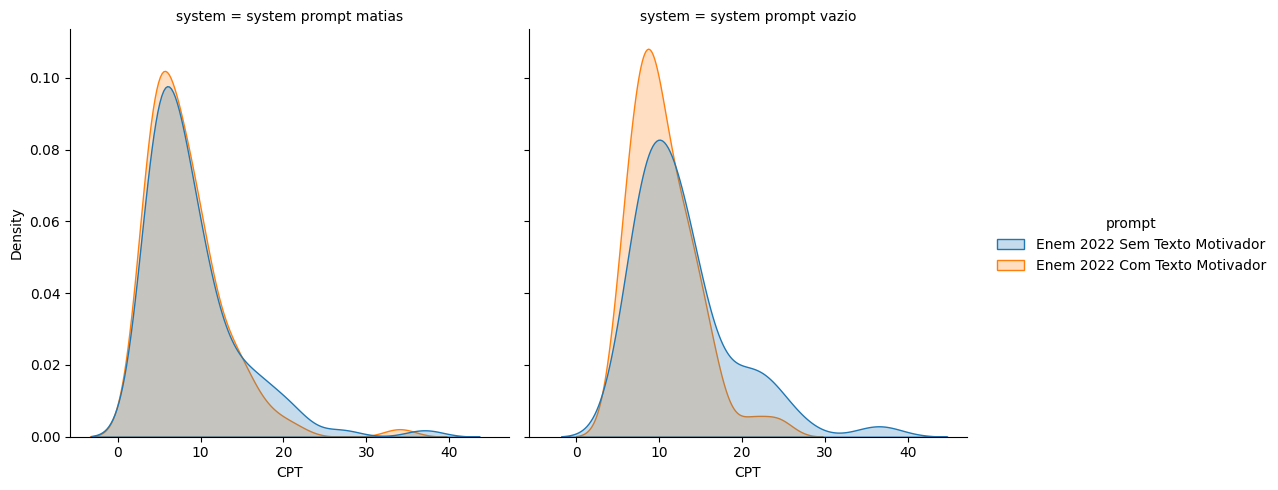

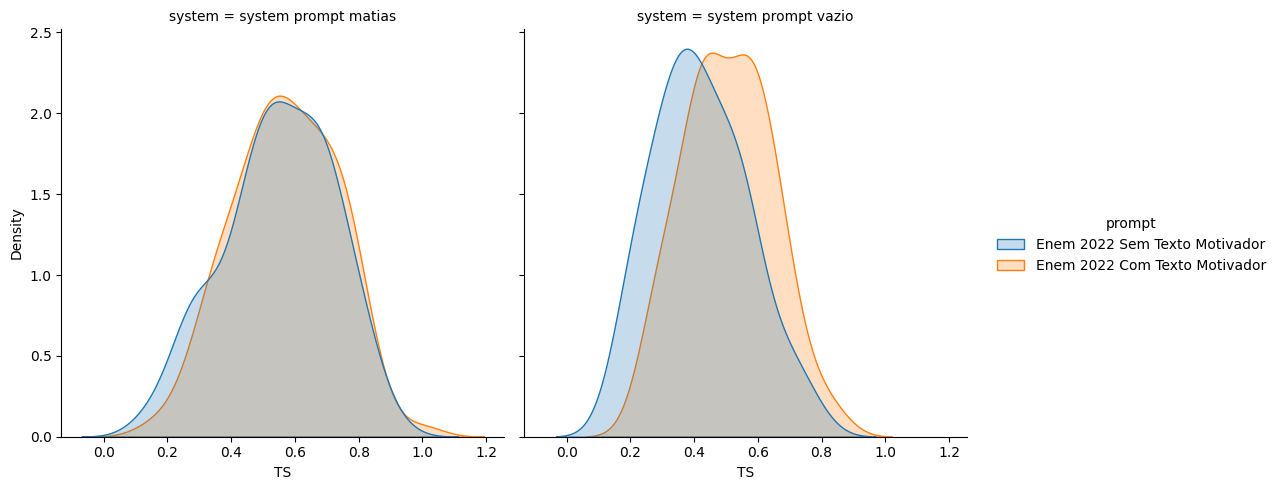

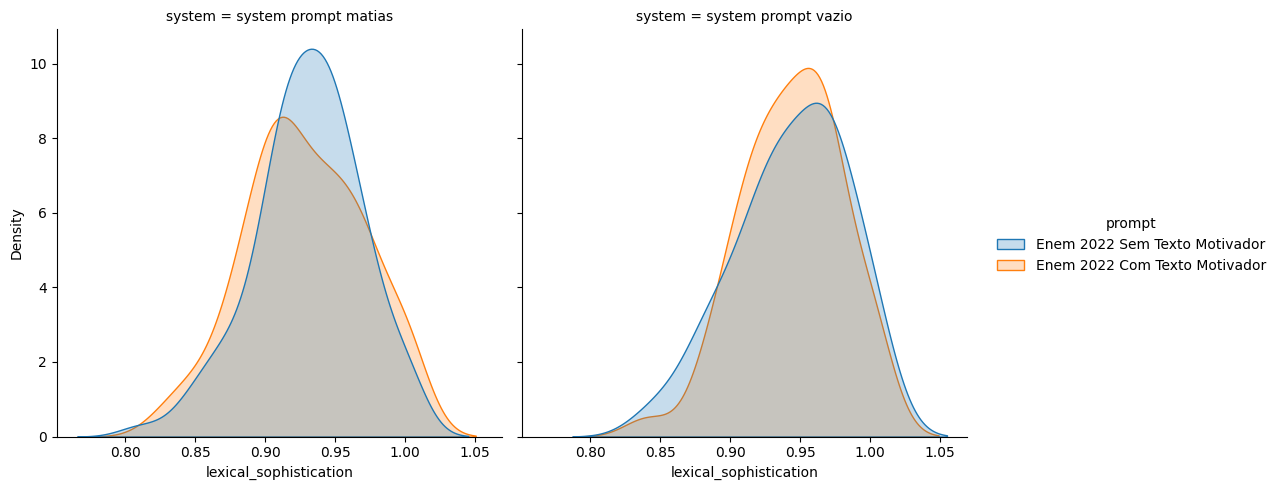

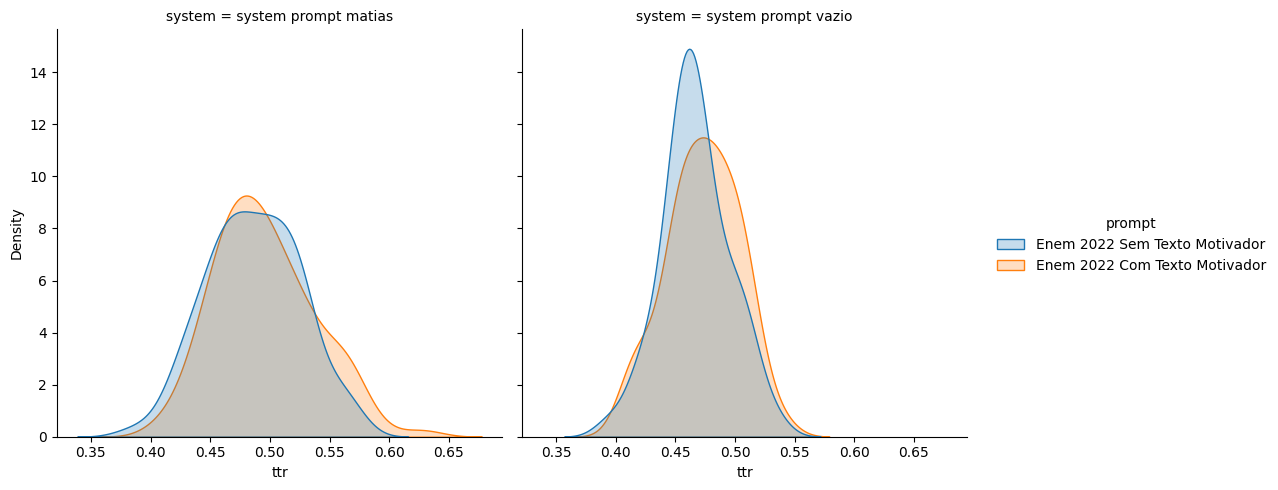

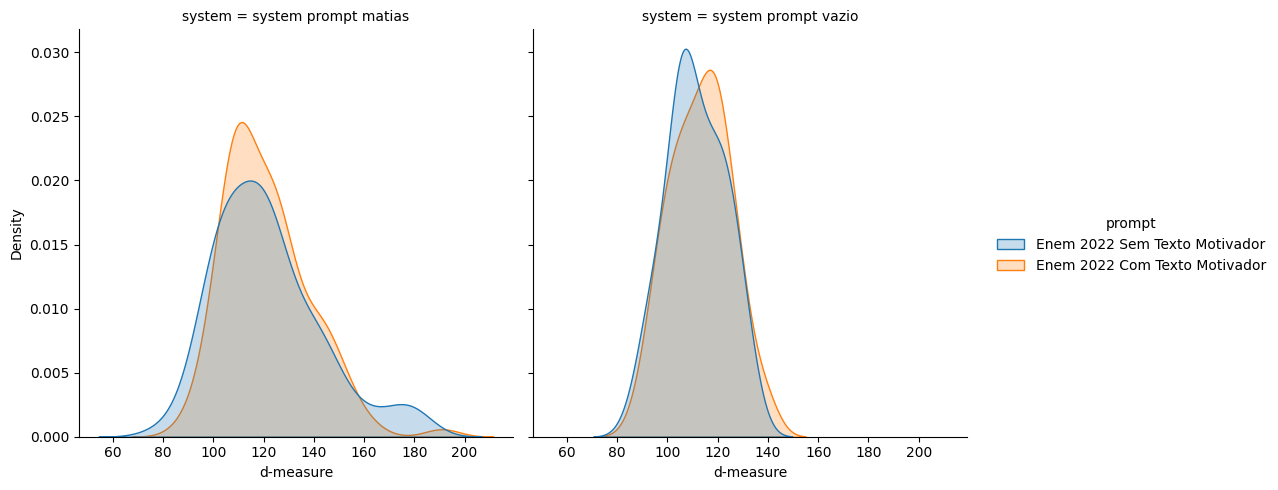

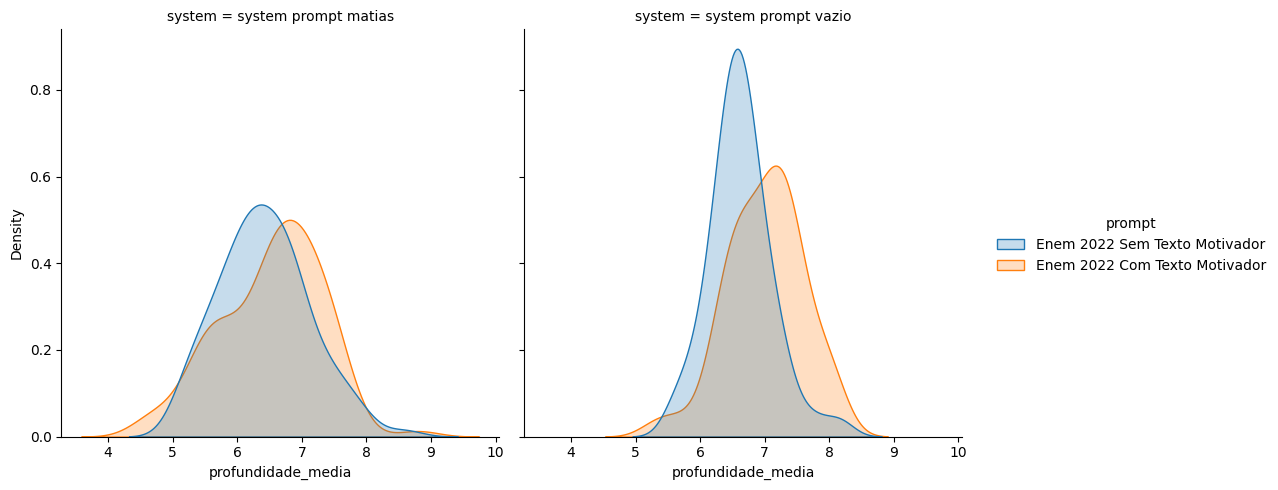

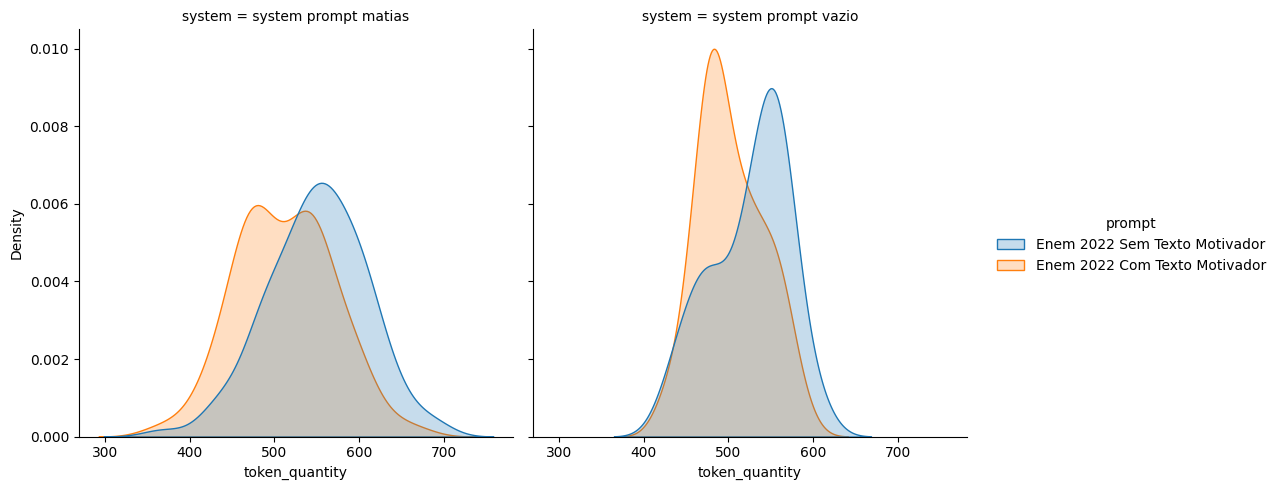

In [31]:
for f in significant_ones["Feature"]:
    # sns.boxplot(matias,y="model",x=f,hue="prompt")
    sns.displot(machines,hue="prompt",x=f,col="system",kind="kde",fill=True,common_norm=False)
    # sns.displot(matias,hue="prompt",x=f,col="model",kind="ecdf")
    plt.show()

In [40]:
z_scores = machines[machines.select_dtypes(include='number').columns].apply(lambda x: (x - x.mean()) / x.std())

In [42]:
z_scores["model"] = machines["model"]

In [45]:
z_scores_melted  = z_scores.melt(id_vars="model", var_name="variable", value_name="z_score")

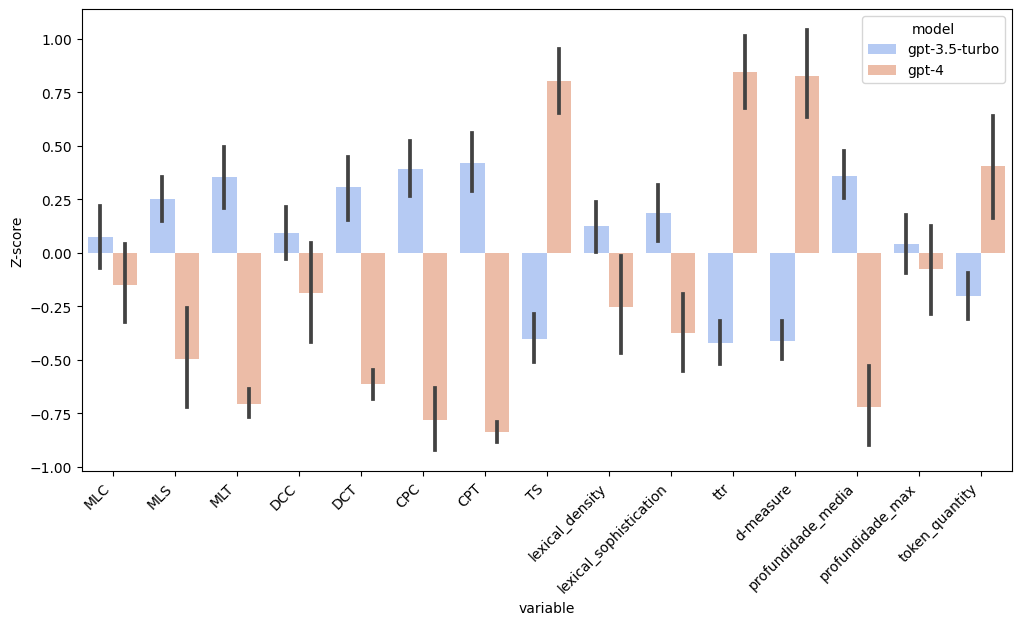

In [61]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=z_scores_melted, x="variable", y="z_score", hue="model", palette="coolwarm",errorbar="ci")
# plt.xlabel("Variable")
plt.ylabel("Z-score")
# plt.title("Z-score of each variable for each model")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()
